<a href="https://colab.research.google.com/github/jusanchezme/AlgorithmsUN2022I/blob/Lab8/Lab8/BubbleSortOptDistributionWithoutRepGroup3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Bubble sort  optimized time complexity, and time complexity histograms for permutations of n different elements 

## Best case - Increasingly sorted array [1,2,...,n]

$$(n-1)  = n-1 \text{ comparisons}$$
$$ +$$
$$  \ \ \ \ \ \ \ \ \ \    0 \ \ \ \ \ \ \  \text{swaps}  \ \ \ \ $$ 

$$T_b(n) = n-1 = \Theta(n) $$

## Worst case - decreasingly sorted array [n,n-1,...,1]

$$\frac{n^2-n}{2} \text{ comparisons}$$
$$ +$$
$$ \frac{n^2-n}{2} \ \ \ \ \text{swaps}\ \ \ \ \ \ \ $$ 

$$T_w(n) = n^2-n = \Theta(n^2) $$

## TODO Average case over unifrom permutations of n different elements

$$\frac{n^2-n}{2} \ \ \ \text{constant comparisons - average is the same }$$
$$ +$$
$$ \frac{n^2-n}{4} \ \ \ \ \ \  \text{average swaps} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $$ 

$$T_a(n) = \frac{3}{4}(n^2-n)= \Theta(n^2) $$



In [1]:
from itertools import permutations
 
n = 3
perm = permutations(range(1,n+1))

c = 0
# Print the obtained permutations
for i in perm:
    print(i)
    c += 1

print(c)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)
6


In [2]:
def bubbleSortOptAllCounters(arr):

    comps = 0
    swaps = 0
    steps = 0
    passes = 0 
    n = len(arr)
 
    # Traverse through all array elements
    for i in range(n-1):
        swapped = False
        passes +=1
        # Last i elements are already in place
        for j in range(0, n-i-1):
 
            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            comps +=1
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swaps +=1
                swapped = True
        if not swapped: break
            
    steps = comps + swaps          
    return(comps,swaps,steps,passes)

In [3]:
def maxinversions(arr):
  maxinv = 0
  n = len(arr) 
  for i in range(n-1):
    inv = 0
    for j in range(i+1,n):
      if arr[j] < arr[i]:
        inv +=1
    if inv > maxinv:
      maxinv = inv
  return maxinv


In [4]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math

def bubbleSortOptDistributionWithoutRep(n):
    ''' Sort n! permutations
    '''
    perm = permutations(range(1,n+1))
    comps = []
    swaps = []
    steps = []
    passes = [] 
    maxinvs = []

    # Print the obtained permutations
    for i in perm:
        i = list(i)
        maxinvs.append(maxinversions(i))
        c,sw,st,p = bubbleSortOptAllCounters(i)
        comps.append(c)
        swaps.append(sw)
        steps.append(st)
        passes.append(p)

    print("n",n)  
    print("number of permutations n! =",math.factorial(n)) 
    print()
    
    b = np.array(range(min(maxinvs)-1,max(maxinvs)+2) ) +0.5
    plt.hist(maxinvs,bins=b, color="cyan")
    plt.title("Bubble Sort Maximun number of inversions")
    plt.xlabel("Maximun number of inversions ")
    plt.ylabel("Frequency")
    plt.show()

    print("Maximun number of inversions") 
    print("Maximun number of inversions exper min =",min(maxinvs))
    print("Maximun number of inversions formula min = 0")
    print("Maximun number of inversions exper max =",max(maxinvs))
    print("Maximun number of inversions formula max n-1 =",n-1)
    print("Maximun number of inversions exper mean =",np.mean(maxinvs))
    print("Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)=",n- math.sqrt(math.pi*n/2))
    print("Maximun number of inversions exper stdev =",np.std(maxinvs))
    print()

    b = np.array(range(min(comps)-1,max(comps)+2) ) +0.5
    plt.hist(comps,bins=b, color="red")
    plt.title("Bubble Sort Comparisons")
    plt.xlabel("Comparisons ")
    plt.ylabel("Frequency")
    plt.show()

    print("Comparisons") 
    print("Comparisons formula (n-1)*n/2 =",(n-1)*n/2)
    print("Comparisons exper min =",min(comps))
    print("Comparisonsexper max =",max(comps))
    print("Comparisons exper mean =",np.mean(comps))
    print("Comparisons exper stdev =",np.std(comps))
    print()

    b = np.array(range(min(swaps)-1,max(swaps)+2) ) +0.5
    plt.hist(swaps,bins=b,color="blue")
    plt.title("Bubble Sort Swaps")
    plt.xlabel("Swaps ")
    plt.ylabel("Frequency")
    plt.show()

    print("Swaps") 
    print("Swaps exper min =",min(swaps))
    print("Swaps min formula = 0")
    print("Swaps exper max =",max(swaps))
    print("Swaps max formula (n-1)*n/2 =",(n-1)*n/2)
    print("Swaps exper mean =",np.mean(swaps))
    print("Swaps mean formula (n-1)*n/4 =",(n-1)*n/4)
    print("Swaps exper stdev =",np.std(swaps))
    print()

    b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
    plt.hist(steps,bins=b,color="green")
    plt.title("Bubble Sort Steps")
    plt.xlabel("Steps ")
    plt.ylabel("Frequency")
    plt.show()

    print("Steps") 
    print("Steps exper min =",min(steps))
    print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
    print("Steps exper max =",max(steps))
    print("Steps max formula (n-1)*n =",(n-1)*n)
    print("Steps exper mean =",np.mean(steps))
    print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
    print("Steps exper stdev",np.std(steps))
    print()

    b = np.array(range(min(passes)-1,max(passes)+2) ) +0.5
    plt.hist(passes,bins=b,color="brown")
    plt.title("Bubble Sort Passes")
    plt.xlabel("Passes")
    plt.ylabel("Frequency")
    plt.show()
        
    print("Passes") 
    print("Passes formula (n-1) =",(n-1))
    print("Passes exper min =",min(passes))
    print("Passes exper max =",max(passes))
    print("Passes exper mean =",np.mean(passes))
    print("Passes exper stdev",np.std(passes))

    #return comps, swaps, steps, passes


n 5
number of permutations n! = 120



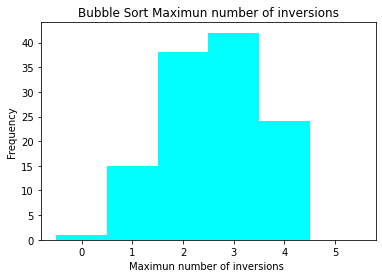

Maximun number of inversions
Maximun number of inversions exper min = 0
Maximun number of inversions formula min = 0
Maximun number of inversions exper max = 4
Maximun number of inversions formula max n-1 = 4
Maximun number of inversions exper mean = 2.6083333333333334
Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)= 2.1975043918010355
Maximun number of inversions exper stdev = 0.9686402267554702



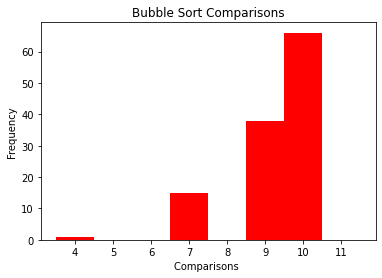

Comparisons
Comparisons formula (n-1)*n/2 = 10.0
Comparisons exper min = 4
Comparisonsexper max = 10
Comparisons exper mean = 9.258333333333333
Comparisons exper stdev = 1.0916030515815824



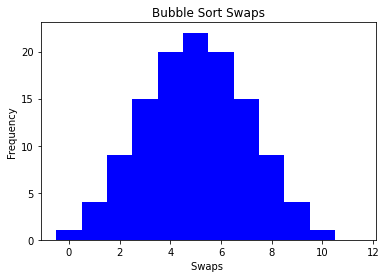

Swaps
Swaps exper min = 0
Swaps min formula = 0
Swaps exper max = 10
Swaps max formula (n-1)*n/2 = 10.0
Swaps exper mean = 5.0
Swaps mean formula (n-1)*n/4 = 5.0
Swaps exper stdev = 2.041241452319315



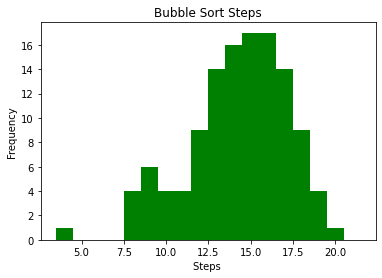

Steps
Steps exper min = 4
Steps min formula (n-1)*n/2 = 10.0
Steps exper max = 20
Steps max formula (n-1)*n = 20
Steps exper mean = 14.258333333333333
Steps mean formula (3/4)*(n**2-n) = 15.0
Steps exper stdev 2.9254510573395156



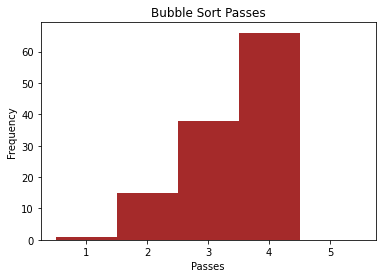

Passes
Passes formula (n-1) = 4
Passes exper min = 1
Passes exper max = 4
Passes exper mean = 3.408333333333333
Passes exper stdev 0.7359328924720122


In [5]:
#Para n = 5
#n = int(input("Ingrese n: "))
n = 5
bubbleSortOptDistributionWithoutRep(n)


n 10
number of permutations n! = 3628800



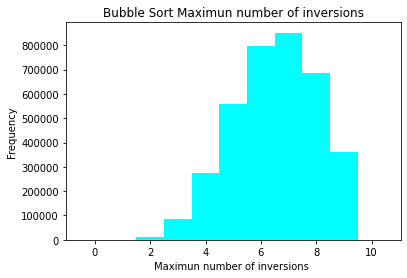

Maximun number of inversions
Maximun number of inversions exper min = 0
Maximun number of inversions formula min = 0
Maximun number of inversions exper max = 9
Maximun number of inversions formula max n-1 = 9
Maximun number of inversions exper mean = 6.5211698082010585
Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)= 6.0366727023939895
Maximun number of inversions exper stdev = 1.5322720434814578



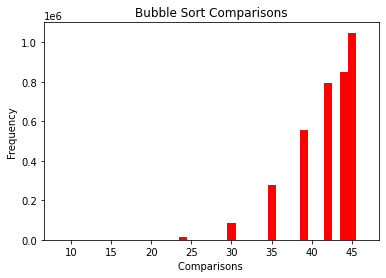

Comparisons
Comparisons formula (n-1)*n/2 = 45.0
Comparisons exper min = 9
Comparisonsexper max = 45
Comparisons exper mean = 41.99318672839506
Comparisons exper stdev = 3.6405715071337372



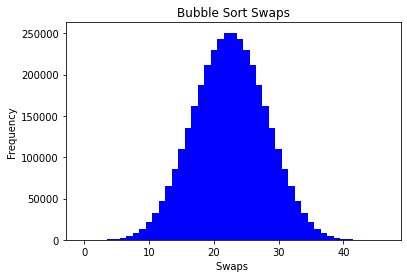

Swaps
Swaps exper min = 0
Swaps min formula = 0
Swaps exper max = 45
Swaps max formula (n-1)*n/2 = 45.0
Swaps exper mean = 22.5
Swaps mean formula (n-1)*n/4 = 22.5
Swaps exper stdev = 5.5901699437494745



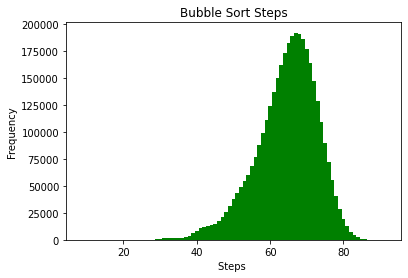

Steps
Steps exper min = 9
Steps min formula (n-1)*n/2 = 45.0
Steps exper max = 90
Steps max formula (n-1)*n = 90
Steps exper mean = 64.49318672839506
Steps mean formula (3/4)*(n**2-n) = 67.5
Steps exper stdev 8.352008300078836



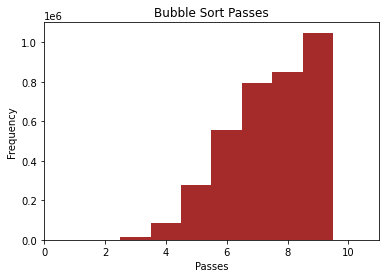

Passes
Passes formula (n-1) = 9
Passes exper min = 1
Passes exper max = 9
Passes exper mean = 7.421169808201058
Passes exper stdev 1.39358945779417


In [6]:
#Para n = 10
#n = int(input("Ingrese n: "))
n = 10
bubbleSortOptDistributionWithoutRep(n)

In [7]:
# https://www.geeksforgeeks.org/bubble-sort/ no optimized adding only a steps counter, also fixing "for i in range(n-1):"

def bubbleSortOptSteps(arr):

    steps = 0
    n = len(arr)
 
    # Traverse through all array elements
    for i in range(n-1):
        swapped = False
        # Last i elements are already in place
        for j in range(0, n-i-1):
 
            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            steps +=1
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
                steps +=1  
                swapped = True
        if not swapped: break        
    return(steps)

In [8]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math

def bubbleSortOptCalculateSteps(n, show = True):
    perm = permutations(range(1,n+1))
    times =  [] 
    # Print the obtained permutations
    for i in perm:
        i = list(i)
        times.append(bubbleSortOptSteps(i))
    if show:
        b = np.array(range(min(times)-1,max(times)+2) ) +0.5
        plt.hist(times,bins=b,color="green")
        plt.title("Bubble Sort Steps")
        plt.xlabel("Steps ")
        plt.ylabel("Frequency")
        plt.show()

        print("Steps") 
        print("Steps exper min =",min(times))
        print("Steps min formula (n-1)*n/2 =",(n-1))
        print("Steps exper max =",max(times))
        print("Steps max formula (n-1)*n =",(n-1)*n)
        print("Steps exper mean =",np.mean(times))
        #-0.06111111, -0.58518519,  0.67361111,  0.00324074
        print("Steps mean formula 0.00324074*n**3 +(0.67361111*n**2)-0.5851851*n -0.06111111=",0.00324074*n**3 +(0.67361111*n**2)-0.5851851*n -0.06111111)
        #print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
        print("Steps exper stdev",np.std(times))
        print()
    return np.mean(times)

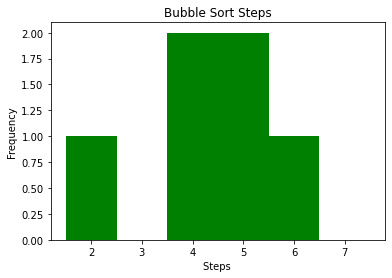

Steps
Steps exper min = 2
Steps min formula (n-1)*n/2 = 2
Steps exper max = 6
Steps max formula (n-1)*n = 6
Steps exper mean = 4.333333333333333
Steps mean formula 0.00324074*n**3 +(0.67361111*n**2)-0.5851851*n -0.06111111= 4.333333559999999
Steps exper stdev 1.247219128924647



4.333333333333333

In [9]:
#Para n = 3
#n = int(input("Calculate Steps given n: "))
n = 3
bubbleSortOptCalculateSteps(n)


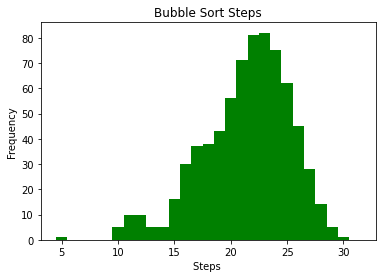

Steps
Steps exper min = 5
Steps min formula (n-1)*n/2 = 5
Steps exper max = 30
Steps max formula (n-1)*n = 30
Steps exper mean = 21.377777777777776
Steps mean formula 0.00324074*n**3 +(0.67361111*n**2)-0.5851851*n -0.06111111= 21.37777809
Steps exper stdev 3.8939490888008335



21.377777777777776

In [10]:
#Para n = 6
#n = int(input("Calculate Steps given n: "))
n = 6
bubbleSortOptCalculateSteps(n)


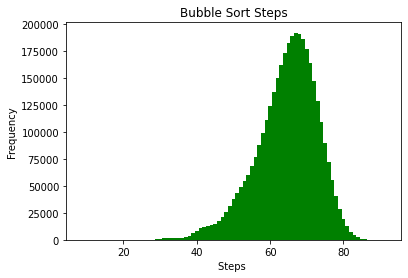

Steps
Steps exper min = 9
Steps min formula (n-1)*n/2 = 9
Steps exper max = 90
Steps max formula (n-1)*n = 90
Steps exper mean = 64.49318672839506
Steps mean formula 0.00324074*n**3 +(0.67361111*n**2)-0.5851851*n -0.06111111= 64.68888889
Steps exper stdev 8.352008300078836



64.49318672839506

In [11]:
#Para n = 10
#n = int(input("Calculate Steps given n: "))
n = 10
bubbleSortOptCalculateSteps(n)

In [12]:
# https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random 

def plot3DbubbleSortOptSteps(N,view_init = False):
    
    fig = plt.figure()
    ax = plt.axes(projection="3d")

    x = []
    y = []
    z = []
    dx = []
    dy = []
    dz = []

    for n in np.arange(3,N+1,1):
        A = range(n)
        times = []

        for P in permutations(A):
            t = bubbleSortOptSteps(list(P)) 
            times.append(t)  
 
        b = np.array(range(min(times)-1, max(times)+1))+0.5
        H = np.array(np.histogram(times,b))
        H[0] = H[0]/np.sum(H[0])

        for i in range(len(H[0])):
            x.append(n)
            y.append(H[1][i])
            z.append(0)
            dx.append(0.1)
            dy.append(0.1)
            dz.append(H[0][i])
    if view_init: 
        ax.view_init(30, 15)
    ax.bar3d(x, y, z, dx, dy, dz, color='palegreen', zsort='average')
    plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


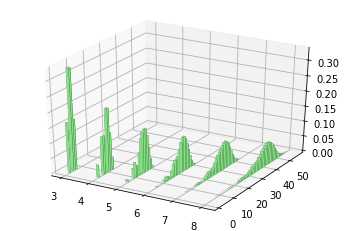

In [13]:
#Para n = 8
#n = int(input("Plot3D given n = "))
n = 8
plot3DbubbleSortOptSteps(n)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


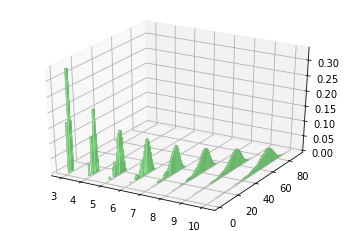

In [14]:
#Para n = 10
#n = int(input("Plot3D given n = "))
n = 10
plot3DbubbleSortOptSteps(n)

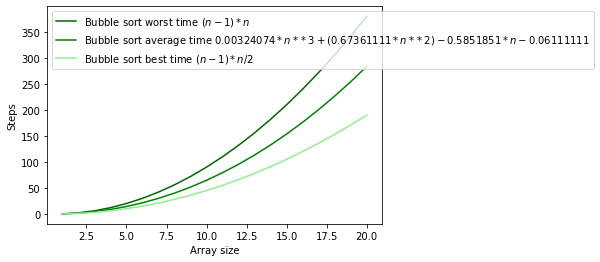

In [15]:
#TODO
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(1,21,1)

plt.plot(n, (n-1)*n,  label = 'Bubble sort worst time $(n-1)*n$', color='darkgreen')
plt.plot(n, 0.00324074*n**3 +(0.67361111*n**2)-0.5851851*n -0.06111111, label = 'Bubble sort average time $0.00324074*n**3 +(0.67361111*n**2)-0.5851851*n -0.06111111$', color='green')
plt.plot(n, (n-1)*n/2, label = 'Bubble sort best time $(n-1)*n/2$',color='lightgreen')
plt.xlabel('Array size')
plt.ylabel('Steps')
plt.legend(loc = 'upper left')


# Average case - expected number of comparisons + swaps on random unifrom permutation of n diferent elements 

$$t_a(n) =  0.00324074n^3 + 0.67361111n^2-0.58518519n -0.06111111 = \Theta(n^2) $$
, 

In [16]:
# TODO Average case on random unifrom permtation of  3/4 (n**2 -n)
import numpy as np 
import pandas as pd
import scipy.linalg as la
n = [3.0,4.0,5.0,6.0]
#n = np.array([3.0,4.0,5.0,6.0])    # Number n of sorted elments
steps = [] 
for i in n:
    steps.append(bubbleSortOptCalculateSteps(int(i), False))
t = np.array(steps) # Average comparisons + swaps for the corresponding n 
n = np.array(n)
data = pd.DataFrame({'n': n, 't': t})
data


,n,t
0,3.0,4.333333
1,4.0,8.583333
2,5.0,14.258333
3,6.0,21.377778


In [17]:
# Interpolating a polynomial of degree 3

X = np.column_stack([n**0,n**1,n**2,n**3])
a = la.solve(X,t)
a

array([-0.06111111, -0.58518519,  0.67361111,  0.00324074])